In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('startup_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,sno,date,startup_name,vertical,subvertical,city,investor_name,type,amount
0,0,1,2020-01-09,byju’s,Technology,E-learning,Bengaluru,Tiger Global,Private Equity,1773.400000
1,1,2,2020-01-13,shuttl,Logistics,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Private Equity,71.365110
2,2,3,2020-01-09,mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital,Private Equity,162.788012
3,3,4,2020-01-02,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,26.601000
4,4,5,2020-01-02,fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed,15.960600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3044 non-null   int64  
 1   sno            3044 non-null   int64  
 2   date           3044 non-null   object 
 3   startup_name   3044 non-null   object 
 4   vertical       3043 non-null   object 
 5   subvertical    3044 non-null   object 
 6   city           3044 non-null   object 
 7   investor_name  3044 non-null   object 
 8   type           3040 non-null   object 
 9   amount         3044 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 237.9+ KB


In [5]:
df = df.drop(columns=(['Unnamed: 0','sno']))

In [6]:
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3044 non-null   datetime64[ns]
 1   startup_name   3044 non-null   object        
 2   vertical       3043 non-null   object        
 3   subvertical    3044 non-null   object        
 4   city           3044 non-null   object        
 5   investor_name  3044 non-null   object        
 6   type           3040 non-null   object        
 7   amount         3044 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 190.4+ KB


## Column type
- numerical = amount
- categorical = startup_name, vertical, city, investor_name, type
- mixed = subvertical

### Univariate analysis

In [8]:
df['amount'].describe()

count     3044.000000
mean       111.069291
std        889.620589
min          0.000000
25%          0.000000
50%          4.433500
75%         35.468000
max      34581.300000
Name: amount, dtype: float64

In [9]:
amount_disclosed = (~(df['amount'] == 0))

In [10]:
((df['amount'] == 0)).sum()/df.shape[0]

0.3193166885676741

In [11]:
df.insert(7,'amount_disclosed',amount_disclosed)

In [12]:
temp = df[df['amount_disclosed']]

<Axes: xlabel='amount', ylabel='Count'>

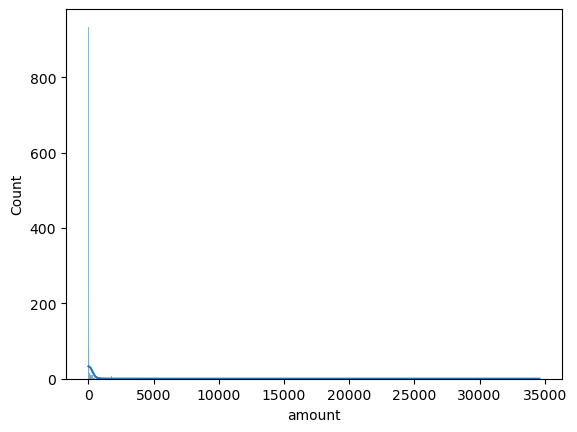

In [13]:
# amount column
sns.histplot(data=temp,x='amount' ,kde=True)

In [14]:
temp['amount'].describe()

count     2072.000000
mean       163.173225
std       1074.413716
min          0.141872
25%          4.284978
50%         15.517250
75%         70.936000
max      34581.300000
Name: amount, dtype: float64

<Axes: ylabel='amount'>

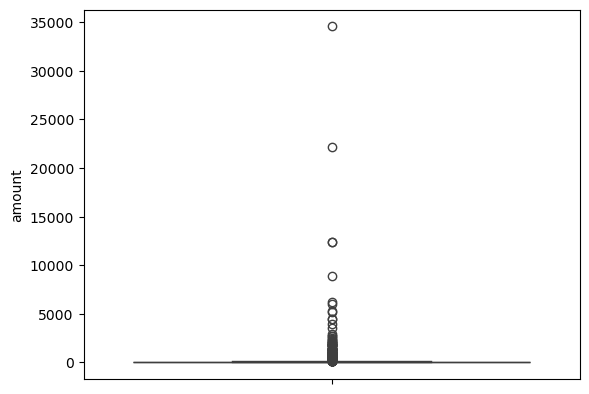

In [15]:
sns.boxplot(temp['amount'])

In [16]:
np.percentile(df['amount'],90)

150.739

In [17]:
temp[temp['amount']>7000]

,date,startup_name,vertical,subvertical,city,investor_name,type,amount_disclosed,amount
31,2019-11-25,paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Other,True,8867.0
60,2019-08-27,rapido bike taxi,Logistics,Bike Taxi,Bengaluru,Westbridge Capital,Private Equity,True,34581.3
651,2017-08-11,flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,True,22167.5
830,2017-05-18,paytm,E-Commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,True,12413.8
966,2017-03-21,flipkart,E-Commerce,ECommerce Marketplace,Bangalore,Microsoft,Private Equity,True,12413.8


In [18]:
temp['amount'].skew()

22.172903421202943

**conclusions**
- The data has 972 null values.That is, 31% of the data about amount is missing.
- 90% of the startups(whose amount data was reveled) received investment less than 150Cr.
- The data is highly positively skewed.
- around 400 values are outliers, it have received investment over 120Cr.
- There is a false entry (index 60) that claim to receive 34500 Cr investment on 27th august 2019 which is inaccurate. The correct Data is 488.4 Cr.

In [19]:
# startup column

In [20]:
df['startup_name'].value_counts().shape

(2310,)

<Axes: xlabel='startup_name'>

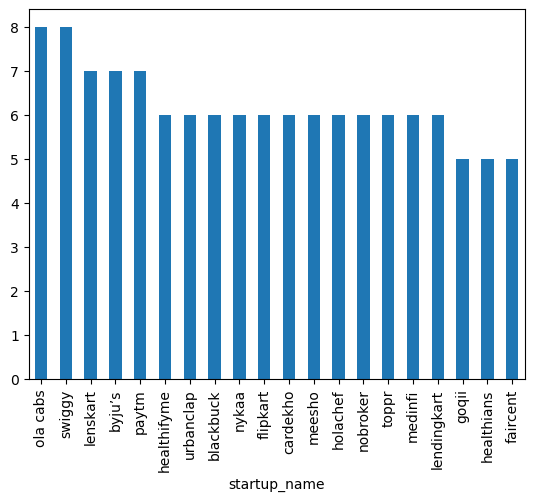

In [21]:
d1 = df.groupby('startup_name')['vertical'].count()
d1.sort_values(ascending=False)[:20].plot(kind='bar')

In [22]:
d1.value_counts()/d1.shape[0]*100

vertical
1    80.043290
2    13.419913
3     3.549784
4     1.558442
5     0.649351
6     0.519481
7     0.129870
8     0.086580
0     0.043290
Name: count, dtype: float64

**conclusion**
- There are around 2300 startups that received fundings.
- The top startups to receive most number of investments include Ola, swiggy, lenskart, byju's and paytm
- 80% of the startups received only 1 investment, 13% received 2, 3% received 3, only 1% received 4 and <1.5% received > 4. 

In [23]:
# vertical column

<Axes: xlabel='vertical'>

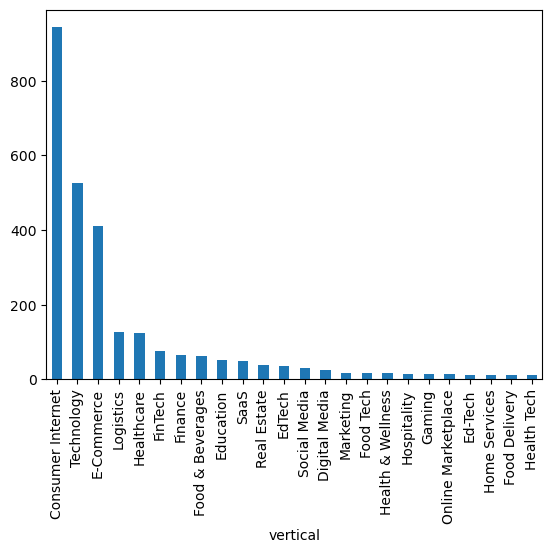

In [24]:
df['vertical'].value_counts().sort_values(ascending=False)[lambda x:x>10].plot(kind='bar')

In [25]:
d1 = df['vertical'].value_counts()

In [26]:
np.percentile(d1,80)

6.0

**conclusions**
- Most common niche for startups was consumer internet, technology and ecommerce.
- 80% of the niche include less than 6 startups.

In [27]:
#city column

<Axes: xlabel='city'>

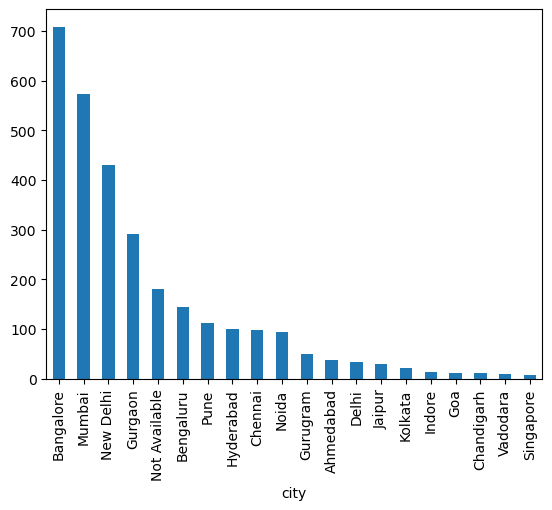

In [28]:
df['city'].value_counts()[lambda x:x>5].plot(kind='bar')

**conclusions**
- Most number of startups are from banglore, mumbai, delhi and gurugram.
- City Data for 180 startups are not available.

<Axes: xlabel='investor_name'>

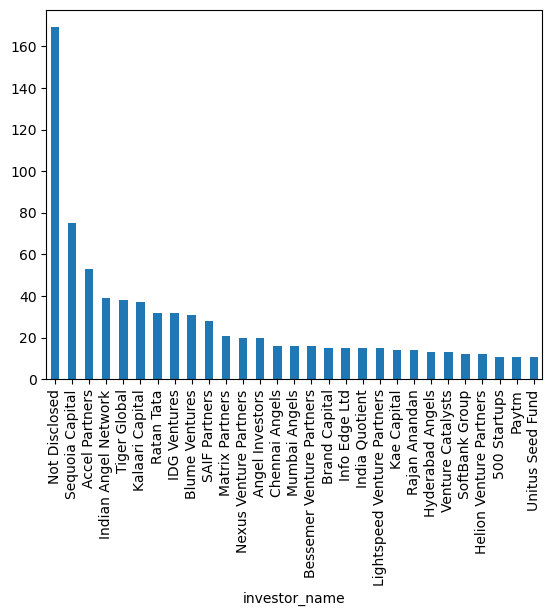

In [29]:
df['investor_name'].value_counts()[lambda x:x>10].plot(kind='bar')

**conclusions**
- Information about most of the investors are not disclosed.
- Investors to invest most number of times in a startup are Sequoia, accel partners, IAN, Tigar global and Kalaari capital.

<Axes: xlabel='type'>

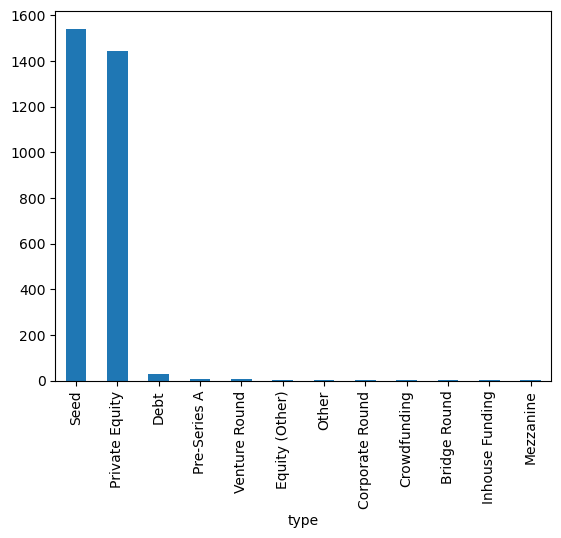

In [30]:
# Type column
df['type'].value_counts().plot(kind='bar')

**conclusions**
- Most of the fundings are Seed Funding and Private Equity Funding.

## Bivariate analysis

In [31]:
df.loc[df['startup_name']=='ola','startup_name'] = 'ola cabs'

In [32]:
temp.loc[temp['startup_name']=='ola','startup_name'] = 'ola cabs'

In [33]:
d1 = temp.groupby('startup_name')['amount'].sum().sort_values(ascending=False)

<Axes: xlabel='startup_name'>

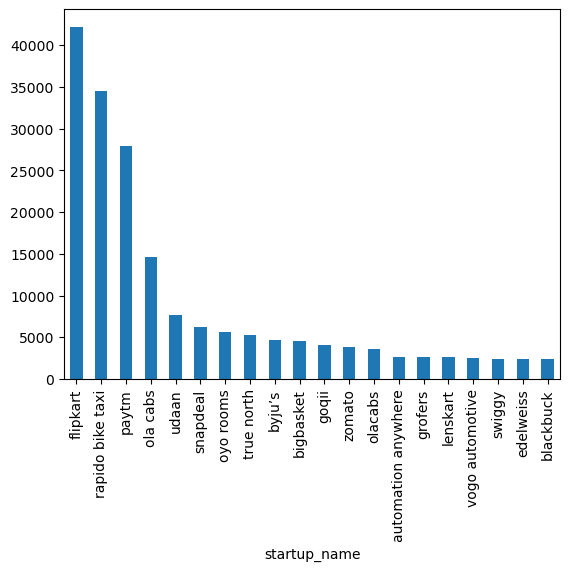

In [34]:
d1.head(20).plot(kind='bar')

In [35]:
d1.describe()

count     1609.000000
mean       210.127360
std       1637.518130
min          0.141872
25%          3.768475
50%         12.413800
75%         66.502500
max      42204.259900
Name: amount, dtype: float64

In [36]:
np.percentile(d1,81)

114.76369481885362

**conclusions**
- 300 companies received more than 120 Cr total investments.
- The top companies include Flipkart, Paytm, Udaan, Ola, and snapdeal. Not including rapido as the data is false.
- There is a huge variation in the investment. only Few of the large startups received large amount of investments.
- The top investments are outliers that shift the mean. This is why mean and median have such high difference.
- Companies like oyo, udaan, snapdeal, bigbasket, true north didnt get the highest number of investment, but are in the top total investment list.
- Famous startups like swiggy, nykaa, meesho, cardekho etc. with more number of investment are not in the top 15 total investment list.

In [37]:
# investor_name

In [38]:
df.loc[df['investor_name']=='Softbank','investor_name'] = 'SoftBank Group'

In [39]:
temp.loc[temp['investor_name']=='Softbank','investor_name'] = 'SoftBank Group'

In [40]:
df.loc[df['investor_name']=='Softbank Group','investor_name'] = 'SoftBank Group'

In [41]:
temp.loc[temp['investor_name']=='Softbank Group','investor_name'] = 'SoftBank Group'

In [42]:
d1 = temp.groupby('investor_name')['amount'].sum().sort_values(ascending=False)

<Axes: xlabel='investor_name'>

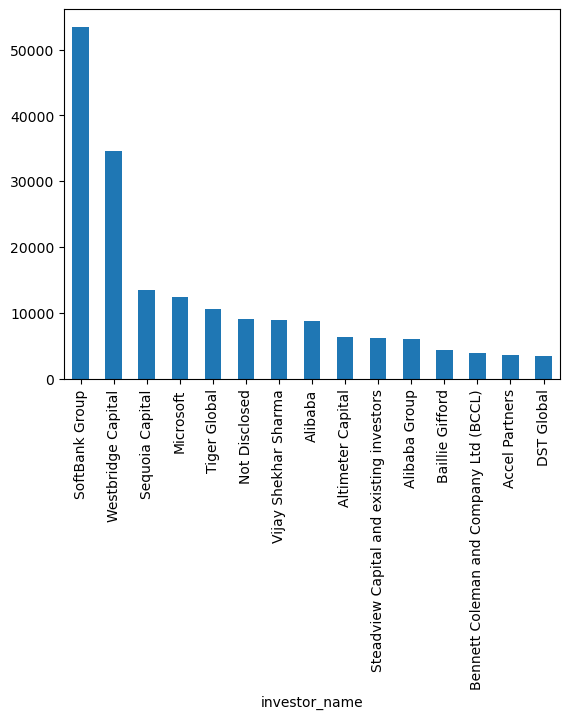

In [43]:
d1.head(15).plot(kind='bar')

In [44]:
d1.describe()

count     1152.000000
mean       293.485176
std       2078.562661
min          0.239409
25%          3.990150
50%         17.734000
75%        106.404000
max      53423.675000
Name: amount, dtype: float64

**conclusions**
- The data is highly variable. The top investors are the biggest outliers that makes the data highly variable and increase the gap between average and median total investment.
- 50% of total investments are less than 18 Cr.
- Top investors include Softbank, westbridge, sequoia, microsoft and tiger.
- Many top investors in terms of investment count, are not in the list of highest investment like accel partners, tiger global, ratan tata, idg ventures, kalaari capital, matrix partners, etc.
- Investors like Soft bank and west bridge who had less than 20 investments turned out to be the biggest investors in terms of total investment.

In [45]:
# vertical

In [46]:
d1 = temp.groupby('vertical')['amount'].sum().sort_values(ascending=False)

In [47]:
d1.head(10)

vertical
E-Commerce                92137.171614
Consumer Internet         55454.965000
Logistics                 46905.848272
Technology                29308.367583
FinTech                   19654.780757
Finance                   17594.380218
Healthcare                10243.830235
B2B                        7452.270150
Food & Beverages           4453.307105
Furniture & Home Decor     4433.500000
Name: amount, dtype: float64

<Axes: xlabel='vertical'>

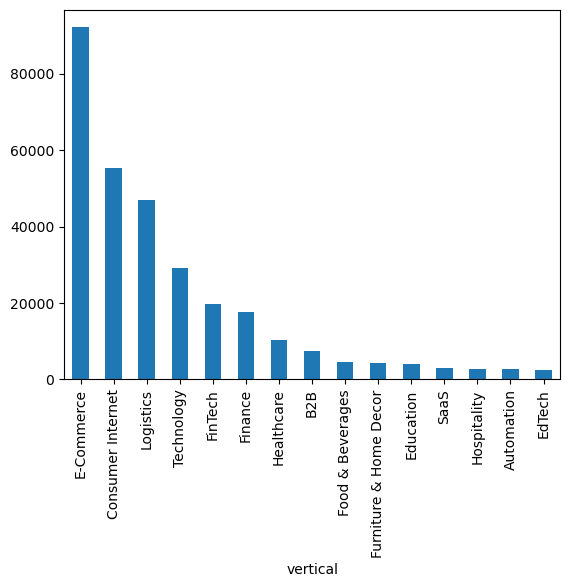

In [48]:
d1.head(15).plot(kind='bar')

In [49]:
d1.describe()

count      152.000000
mean      2224.308701
std       9914.977721
min          0.141872
25%         10.197050
50%        114.725680
75%        511.404225
max      92137.171614
Name: amount, dtype: float64

**conclusions**
- Here we can see that the data is highly variable. the gap between the median and the mean is evident.
- Some few verticals receive very high investments.
- The top vertivals include ecommerce, consumer internet, logistics and fintech, which could be seen in in the top startups list that included companies like flipkart, paytm, ola, snapdeal. All of these companies are example of consumer internet , ecommerce fintech etc.
- The highest investment vertical is ecommerce, consumer internet and logistics.
- Median vertical investment is 115 Cr and highest is 92 Cr.
- The top verticals in terms of highest total investments and highest number of investments are almost consistant, with the top verticals including technology, consumer internet, ecommerce, fintech, logistics and healthcare.

In [50]:
# city

In [51]:
df.loc[df['city']=='Bengaluru','city'] = 'Bangalore'

In [52]:
df.loc[df['city']=='Gurgaon','city'] = 'Gurugram'

In [53]:
temp.loc[temp['city']=='Bengaluru','city'] = 'Bangalore'

In [54]:
temp.loc[temp['city']=='Gurgaon','city'] = 'Gurugram'

In [55]:
d1 = temp.groupby('city')['amount'].sum().sort_values(ascending=False)

In [56]:
d1.head(10)

city
Bangalore        164236.940274
Mumbai            43967.684658
Gurugram          34387.233801
New Delhi         27462.135331
Noida             11377.815188
Not Available     11277.616918
Chennai            6373.306989
Pune               6362.799594
Menlo Park         3990.150000
Hyderabad          3561.663131
Name: amount, dtype: float64

<Axes: xlabel='city'>

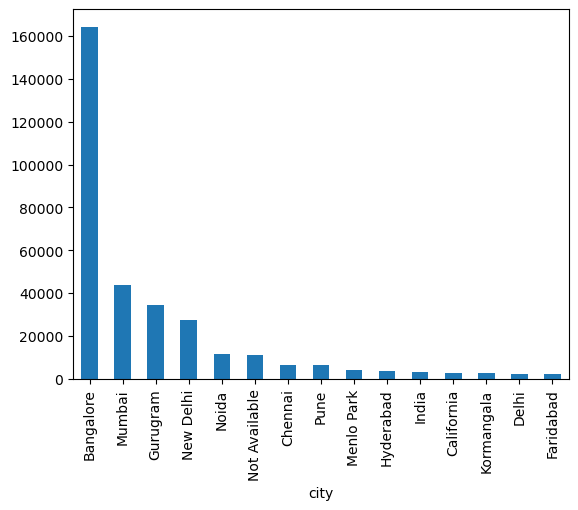

In [57]:
d1.head(15).plot(kind='bar')

**conclusions**
- The highest investment are received by the startups form bangalore, mumbai, new delhi ,gurugram and noida.
- This is consistant with the fact that most of the startups are situated from these places only.
- Menlo park(California) has popped up randomly as only 1 startup have come from that place and made it to the top 10 list.

In [58]:
temp[temp['city']=='Menlo Park']

,date,startup_name,vertical,subvertical,city,investor_name,type,amount_disclosed,amount
42,2019-09-04,goqii,Healthcare,Wearable Fitness Bands,Menlo Park,Bennett Coleman and Company Ltd (BCCL),Private Equity,True,3990.15


In [62]:
temp.loc[temp['startup_name']=='availfinance','startup_name'] = 'avail finance' 

In [63]:
temp.loc[temp['startup_name']=='OfBusiness','startup_name'] = 'ofbusiness' 

In [64]:
temp.loc[temp['startup_name']=='Ofbusiness','startup_name'] = 'ofbusiness' 

In [65]:
temp.to_csv('startup_cleaned.csv')